In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafr = pd.read_csv("FreyerSutherland.dat", sep="\t", index_col=False)

data = np.genfromtxt('FreyerSutherland.dat')

data = data[1:]
time = data[:,0]
yobs = data[:,1]
subj = data[:,2]
Oxigen = data[:,5]
Glucose = data[:,6]


In [19]:
datafr[datafr.Subject==9]

,Time,Level,Subject,Variable,Weight,Oxygen,Glucose
115,4.3240,589.2852,9,2,1,0.28,16.5
116,6.0639,1478.7054,9,2,1,0.28,16.5
117,8.1519,4519.2179,9,2,1,0.28,16.5
118,11.3251,29900.7702,9,2,1,0.28,16.5
119,13.1763,54890.3296,9,2,1,0.28,16.5
120,15.6787,88308.0508,9,2,1,0.28,16.5
121,17.6804,125000.0000,9,2,1,0.28,16.5
122,19.3763,201000.0000,9,2,1,0.28,16.5
123,23.4113,236000.0000,9,2,1,0.28,16.5


soggetto 1  len 15 , Oxygen 0.280 , Glucose 16.500 
Initial Objective: 2.810208740170101e-08
Final Objective: 1.1618362657892146e-08
Solution
x1 = 0.08984834745526313
x2 = 0.003427068533003335


soggetto 2  len 13 , Oxygen 0.280 , Glucose 16.500 
Initial Objective: 1.3129421141631316e-07
Final Objective: 1.9243016771216883e-09
Solution
x1 = 0.06513674792434693
x2 = 0.048127431491450295


soggetto 3  len 16 , Oxygen 0.070 , Glucose 16.500 
Initial Objective: 3.8011474453155053e-07
Final Objective: 4.585375667383414e-09
Solution
x1 = 0.119176013450993
x2 = 0.000549597274802586


soggetto 4  len 12 , Oxygen 0.070 , Glucose 16.500 
Initial Objective: 9.489647471113416e-09
Final Objective: 1.9954827506820843e-09
Solution
x1 = 0.11975267623318345
x2 = 0.0012424865375738532


soggetto 5  len 18 , Oxygen 0.280 , Glucose 0.080 
Initial Objective: 7.790961639640156e-08
Final Objective: 2.0913141514907142e-08
Solution
x1 = 0.10740825474262239
x2 = 0.0019312669694423685


soggetto 6  len 12 , Oxyg

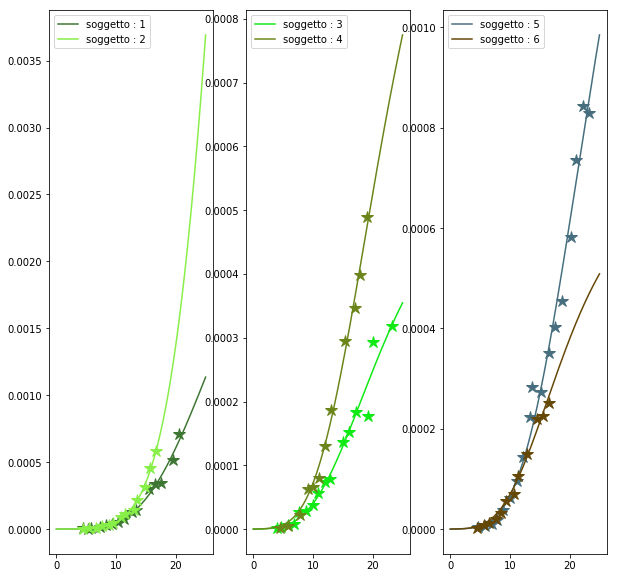

In [92]:
#import numpy as np
from scipy.optimize import minimize
alpha_list = [] ;kappa_list = []
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))

for num in range(1,7):

    timei = time[subj == num]
    yobsi = yobs[subj == num]
    print("soggetto %d  len %d , Oxygen %.3f , Glucose %.3f "% (num , len(timei), Oxigen[subj==num][0], Glucose[subj==num][0]))


    
    def x_fun_espl(t, alpha, kappa): #, Y_0
        y = kappa * np.exp( np.log(1e-7/kappa) *  np.exp(- alpha* t))
        return y

    def objective(phii):
        global timei, yobsi
        alpha = phii[0]; kappa = phii[1] #; Y_0 = phii[2]
        x_hat_i= x_fun_espl(timei, alpha, kappa)  # Y_0
        return np.sum(np.power((yobsi-x_hat_i), 2))




    # initial guesses
    n = 2
    x0 = np.zeros(n)
    x0[0] = 0.10
    x0[1] = 0.002
    #x0[2] = 1e-7

    # show initial objective
    print('Initial Objective: ' + str(objective(x0)))

    # optimize
    solution = minimize(objective,x0, method='Nelder-Mead') 
    x = solution.x

    # show final objective
    print('Final Objective: ' + str(objective(x)))

    # print solution
    print('Solution')
    print('x1 = ' + str(x[0]))
    print('x2 = ' + str(x[1]))
    #print('x3 = ' + str(x[2]))
    print("\n")
    alpha_list.append(x[0]); kappa_list.append(x[1]); #Y_0_list.append(x[2])
    c_r = tuple(np.random.rand(1,3).tolist()[0])
    if num < 3:
        ax1.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax1.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
    elif num < 5:
        ax2.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax2.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
    else:
        ax3.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax3.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
        
    
ax1.legend(); ax2.legend(); ax3.legend()


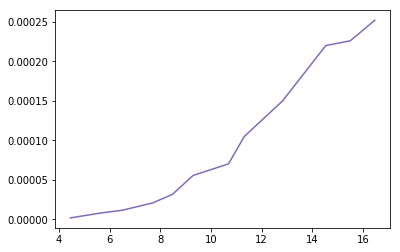

In [91]:
c_r = tuple(np.random.rand(1,3).tolist()[0])
plt.plot(timei, yobsi, color=c_r)

In [72]:
c_r

(0.9756027795774554,
 0.8483492835106048,
 0.3584124277020915,
 0.05755476004194038)